# <u><font color = 'Green'>  Digit Recognizer Machine Learning and Deep Learning <u></font>

## <u><font color = 'blue'> Machine Learning </u> </font>

<b>For this problem, I have used the provided MNIST dataset of digits, which is having 42K records and 60 features with 1 column of labels.The 60 features contain 20 features in each direction of diagonal, vertical and horizontal. The data is provided for the 10 digits from 0-9 which are considered classes. The name of the data file used is trainfeatures42k.csv <b>

In [6]:
####### DIGIT RECOGNIZER DATA SET - FORM DIGITS ################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
####################################################################
# 2a. Read file into pandas dataframe
df = pd.read_csv('trainfeatures42k.csv')  
class_label = 'Label'
features = df.columns.to_list()
features.remove(class_label)   
df.shape
df.head(20)




,Label,PC0-d,PC1-d,PC2-d,PC3-d,PC4-d,PC5-d,PC6-d,PC7-d,PC8-d,...,PC10-h,PC11-h,PC12-h,PC13-h,PC14-h,PC15-h,PC16-h,PC17-h,PC18-h,PC19-h
0,1,538.267964,-314.023125,443.809967,470.780028,176.561668,-336.130920,23.221391,-45.523748,-232.436917,...,-90.463868,107.934027,25.417533,-97.235438,-66.589588,22.468479,-111.476083,62.807185,74.771969,-7.480156
1,0,-238.730010,224.609513,-197.464121,23.557813,-219.122649,-223.695514,-172.689736,125.561839,-194.150108,...,44.464226,-7.825244,-5.260700,18.905444,9.593545,-40.015688,-96.469679,24.317962,-137.943930,94.025390
2,1,51.647165,-27.271305,-185.258708,-50.103687,216.830344,-207.152351,60.301310,95.431402,-117.051561,...,-12.722596,-3.039582,-26.963181,-18.563280,16.095458,-81.075489,-42.589100,52.083444,-29.080312,42.344233
3,4,110.890600,62.854265,-97.528878,-21.291295,297.976619,-32.899732,34.647964,-85.574818,-60.120835,...,23.112458,-62.558569,-115.846264,-16.405413,-37.548852,-269.649782,-130.725868,-23.526366,-20.448849,37.234782
4,0,-300.296735,152.547221,-91.949199,90.416744,-453.385929,-89.195463,-15.051828,-38.036779,-190.363654,...,-28.107534,30.400739,-47.075128,-13.092383,-85.371052,-141.450375,-36.200100,114.188444,-21.988893,-46.480710
5,0,47.308781,-90.131373,-237.415757,-101.694242,-36.860673,-446.042031,-125.559722,8.427990,-215.704198,...,-142.118733,-4.116103,-79.312456,-86.516936,-63.916825,-97.801195,69.688295,-33.366234,3.822318,96.283878
6,7,109.059491,140.770618,60.867612,-10.178242,120.520922,-229.382193,161.905185,7.219460,44.387968,...,-89.265051,-44.666589,-78.864663,-131.680735,-184.277564,6.465627,-116.756762,-38.012091,46.957104,37.829305
7,3,74.759546,-10.086218,262.291469,77.239119,4.242614,-35.819135,478.151249,-34.599970,81.721257,...,7.548017,-94.469616,123.511085,15.910688,-112.577034,190.197851,96.471272,7.240221,55.763977,389.171004
8,5,-284.079751,-119.194301,-254.120132,81.590371,262.420656,-535.388011,234.982926,-8.521091,-88.086027,...,65.326240,-113.166612,-297.698820,104.611900,26.992263,-105.422637,-316.111620,-131.692334,-104.393696,66.406344
9,3,31.789525,-225.234923,327.369279,-519.416893,285.657465,-589.171374,-57.223421,234.024184,-138.450509,...,30.193086,-159.540486,209.918577,-357.360244,124.947170,-370.454024,132.122110,-98.676575,-191.951662,-9.594313


### <b>1. A Data Processing</b><br>
The following techniques are used for data processing : <br>
    <b>i. Finding Outliers and dropping them</b> - The outliers are found using the Mahalanobis distance. 2 outliers are removed per class (digit)<br>
    <b>ii. Normalization</b> -Normalization is done after the outliers are removed so that it picks up the right max and min values.<br>
    <b>iii. Feature Ranking and Selection</b> Feature ranking and selection is done using Fisher's LDR. 

In [7]:
######### Data Processing ##################################################
def mahalanobis_dist(X: np.ndarray, mean: np.ndarray, cov: np.ndarray):
   """ Calculate the Mahalanobs distance for an array of n samples and m dimensions."""
   n = X.shape[0]
   X_c = X - mean
   X_cov_inv = np.linalg.inv(cov)
   left = np.matmul(X_c, X_cov_inv)
   # Below we calculate X_c*X_cov_inv*X_c'
   # size n x n
   dist_squared_matrix = np.matmul(left, X_c.T)
   diag = np.diagonal(dist_squared_matrix)
   return diag
 ##############################################################################  
   
    

################## Finding Outliers using Mahanobis distance ######################
def find_outliers(X: np.ndarray, p:int) -> np.ndarray:
    X_mean = np.mean(X, axis=0)
    X_cov  = np.cov(X, rowvar = False)
    dist_squared = mahalanobis_dist(X,X_mean,X_cov)
    idx = np.flip(np.argsort(dist_squared)).tolist()
    dist_sorted = np.take(dist_squared, idx).tolist()
    return dist_sorted[0:p], idx[0:p]

def normalize(X: np.ndarray, a:float, b: float):
    min = X.min(axis = 0).T
    max = X.max(axis = 0).T
    X_norm = ((X - min)/(max - min))* (b-a)+a
    return X_norm

def fishers_LDR (labels,X:np.ndarray):
    classes = np.unique(labels)
    k = len(classes)
    m = X.shape[1]
    
    #Calculate standard deviation per class per feature
    
    std = np.zeros([k,m])
    for cl in classes:
        std[cl] = np.std(X[np.where(labels[:]==cl)[0],:], axis = 0)
    total_std = np.sum(std, axis =0)
    mean = np.zeros([k,m])
    W_temp = np.zeros([m,0])
    
    for cl in classes:
        mean[cl] = np.mean(X[np.where(labels[:] == cl)[0],:], axis = 0)
        mean_div = np.divide(mean[cl],total_std).reshape(-1,1)
        W_temp = np.concatenate((W_temp , mean_div), axis = 1)
    
    ind_temp = np.empty([m,0],dtype = int)
    cor_temp = np.empty([m,0])
    
    for j in range(0,k):
        WW_aux = np.concatenate((W_temp[:,0:j], W_temp[:, j+1:k]),axis = 1)
        WW_cur = np.repeat(W_temp[:,j].reshape(-1,1),k-1, axis =1)
        WW = (np.subtract(WW_cur,WW_aux))
        rankW = np.min(WW, axis = -1).reshape(-1,1)
        rankW_abs = -1 *np.abs(rankW.T)
        ind_temp = np.concatenate((ind_temp,np.argsort(rankW_abs).T), axis = 1)
        cor_temp = np.concatenate((cor_temp,np.sort(rankW_abs).T),axis = 1)
        
    ind_temp = ind_temp.T.flatten('F').reshape(-1,1).T    
    cor_temp = cor_temp.T.flatten('F').reshape(-1,1).T  

    cor_sort = np.sort(cor_temp)
    index = np.argsort(cor_temp)
    index_sort = ind_temp.take(index).reshape(1,-1)
    
    ind_temp2 = np.fliplr(index_sort)
    cor_temp2 = np.fliplr(cor_sort)
    
    u, v = np.unique(ind_temp2, return_index = True)
    w = np.sort(v).reshape(-1,1)
    s = np.argsort(v).reshape(-1,1)
    values = np.fliplr((cor_temp2.take(w)).T)
    rank_index = np.fliplr((u.take(s)).T)
    return values.flatten(), rank_index.flatten()

#############################################################################

# find possible outliers per class (digit)
n_to_remove = 2 # number of outliers to remove (p in find_outliers)
outliers_dist = []
outliers_idx = []
for cl in  range(10):
    class_data = df.loc [df[class_label] == cl] 
    #Xclass =  class_data.to_numpy()[:,1:]
    class_dist, class_idx = find_outliers(class_data.to_numpy()[:,1:], n_to_remove) # drop label and index columns
    
    df_idx = class_data.iloc[class_idx].index.tolist()
    outliers_dist = outliers_dist + class_dist
    outliers_idx  = outliers_idx + df_idx
    
outliers_df = df.iloc[outliers_idx].copy().drop(features, axis = 1) 
outliers_df['mahalanobis']  = outliers_dist

# print the list of possible outliers and their mahalanobis distance
print(outliers_df)
# remove outliers
df.drop(outliers_idx, inplace = True) 

X = df.iloc[:, 1:61].to_numpy()
X = normalize(X, 0,1) 
labels = df[class_label].to_numpy(dtype = int).reshape(-1,1)
norm_data_with_labels = np.hstack((labels,X))
df_norm = pd.DataFrame(norm_data_with_labels, columns = df.columns.to_list())

vals, ranks_idx = fishers_LDR(labels,X)
ranked_features = np.array(features).take(ranks_idx)
print("The list of ranked features is : ", ranked_features)  

###################################################################################################

       Label  mahalanobis
1375       0   363.696052
8062       0   301.114189
23538      1  2296.138507
28669      1  1905.528098
15104      2   318.611033
3960       2   247.669997
11593      3   319.063090
22492      3   286.780294
23511      4   500.156612
16301      4   423.947964
13060      5   307.118278
29253      5   294.054455
18502      6   514.962846
5901       6   393.374235
15121      7   533.835864
20878      7   510.585046
22558      8   412.276634
1299       8   314.643886
40354      9   607.702209
2220       9   587.270711
The list of ranked features is :  ['PC0-v' 'PC2-d' 'PC3-d' 'PC7-d' 'PC2-h' 'PC6-h' 'PC3-v' 'PC11-v' 'PC6-d'
 'PC0-d' 'PC14-v' 'PC4-h' 'PC10-v' 'PC9-d' 'PC5-h' 'PC8-v' 'PC18-h'
 'PC1-d' 'PC8-d' 'PC9-h' 'PC1-h' 'PC11-h' 'PC2-v' 'PC12-v' 'PC4-d' 'PC7-v'
 'PC9-v' 'PC12-h' 'PC1-v' 'PC10-h' 'PC15-h' 'PC10-d' 'PC18-d' 'PC5-v'
 'PC7-h' 'PC13-h' 'PC16-h' 'PC19-h' 'PC11-d' 'PC15-v' 'PC3-h' 'PC14-d'
 'PC6-v' 'PC16-v' 'PC19-d' 'PC12-d' 'PC13-v' 'PC17-v' 'PC17-d'

### 1C Preparing the data for modeling

#### <b>Split the data and cross validate</b><br>
<b>K-Fold Cross Validation is performed to split the data into training and test data set. The number of folds selected in 4.This number was selected by trial and error method. At first, I selected Number of folds as 5 and it was giving a low accuracy in 70's. When I reduced the number of folds to 4, I could get accuracy of 90<b> 

In [8]:
########### K-Fold Cross Validation #########################################################


def kfold_cross_validation(num_data: int, num_folds: int, shuffle: bool):
    
    if shuffle :
        data = np.random.permutation(num_data)
    else:
        data = np.arange(num_data)
        
    test_data_size = math.ceil(num_data/num_folds)
    total_size = num_folds*test_data_size

    part = np.zeros((total_size,))
    part = range(num_data) 
   # fill in the missing data with random samples
    if (total_size < num_data):
        part[total_size:num_data] = np.random.sample(range(1, num_data),total_size-num_data)
        
   #partition data for each fold . this will be the base for our test data  
    part = np.reshape(part,(num_folds,test_data_size))
    
    test = []
    training = []
    for i in range(num_folds):
        test.append(data[part[i]])
        #Get the indices that are not part of the test data partition which makes the training data
        indices = part[[j for j in range (num_folds) if j != i]].flatten()
        training.append(data[indices])
    return test, training    

# Run the  K-fold cross validation
num_folds = 4
# Get the test and training data
test,training = kfold_cross_validation(X.shape[0], num_folds, True)

  # Prepare Training and test sets
X_train = []
X_test = []
y_train = []
y_actual = []

top_features = ranked_features[0:30]  #Change to increase/reduce the number of features

for i in range(num_folds):
    X_train.append(df_norm.loc[training[i],top_features].to_numpy())
    X_test.append(df_norm.loc[test[i],top_features].to_numpy())
    y_train.append(df_norm.loc[training[i],[class_label]].to_numpy(dtype=int).ravel())
    y_actual.append(df_norm.loc[test[i],[class_label]].to_numpy(dtype=int).ravel())                                

print('Number of records in X_train', len(X_train[:][0]))
print('Number of records in X_test', len(X_test[:][0]))
print('Number of records in y_train', len(y_train[:][0]))
print('Number of records in y_actual', len(y_actual[:][0]))

################# ##########################################################################


Number of records in X_train 31485
Number of records in X_test 10495
Number of records in y_train 31485
Number of records in y_actual 10495


### <b>1B. Machine Learning Techniques <br></b>
<b> Gaussian Bayes Classifer : </b> Below is the implementation of the Bayes Classifier. I had first used the formula of covariance but that didn't work for my data. I was getting very low accuracy in 10s. I them looked up the Naives Bayes Classifier and followed thier formula. This formula uses variance instead of covariance. The below formula is used in the computation which gave the accuracy of 89%
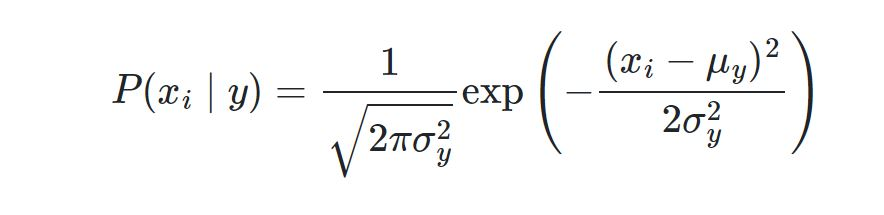

Precision score: 0.85
Recall score: 0.85
f1 score: 0.85
Accuracy: 89.13
Precision score: 0.85
Recall score: 0.85
f1 score: 0.85
Accuracy: 88.78
Precision score: 0.84
Recall score: 0.84
f1 score: 0.84
Accuracy: 88.53
Precision score: 0.85
Recall score: 0.85
f1 score: 0.85
Accuracy: 89.13


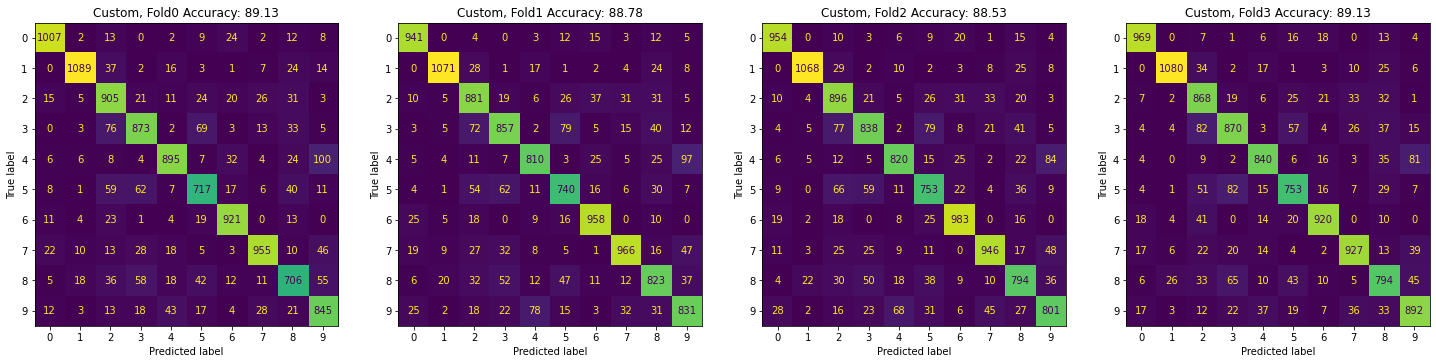

In [9]:
class GBayesClassifier:
    
    def __init__(self):
        self.train_prob_membership = None
        self.train_variances = None
        self.train_means = None
        self.num_features = None
        self.num_classes = None
        
    def train(self, x , y):
        classes = np.unique(y)
        
        self.num_classes = len(classes)
        self.num_features = x.shape[1]
        self.train_prob_membership = np.zeros(self.num_classes)
        self.train_variances = np.zeros((self.num_classes,self.num_features))
        self.train_means = np.zeros((self.num_classes,self.num_features))
        
        for idx, cls in enumerate(classes):
            self.train_means[idx] = x[np.where(y == cls)].mean(axis=0)
            self.train_variances[idx] = x[np.where(y == cls)].var(axis=0)
            self.train_prob_membership[idx] = len(np.where(y == cls)[0]) / len(y)

    def predict_prob(self,x):
       
       num_obs, num_feats = x.shape

       probs = np.zeros((num_obs, self.num_classes)) 
       for obs in range(num_obs):
           for cls in range(self.num_classes):
               p = self.train_prob_membership[cls]
               t1 = 1 / np.sqrt(2 * np.pi * self.train_variances[cls])
               t2 = (x[obs] - self.train_means[cls]) ** 2 / self.train_variances[cls]
               t3 = np.exp(-0.5 * t2)
               t4 = (t1 * t3).prod()
               probs[obs, cls] = t4 *p
           probs[obs,:] = probs[obs, :] / np.sum(probs[obs,:])
                                                 
       return probs

    def predict (self,x):
        return np.argmax(self.predict_prob(x),axis=1)
     
###############################################################################################

figure, ax = plt.subplots(nrows = 1, ncols = num_folds, figsize = (25,10))
min_accuracy = 100
bayes_report = {}


for i in range(num_folds):
    
    gbc = GBayesClassifier()
    gbc.train(X_train[i], y_train[i])
    y_pred = gbc.predict(X_test[i])
         
    cm = confusion_matrix(y_actual[i], y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix =cm)
    #f1_score(y_actual, y_pred, labels=np.unique(y_pred))
    
    precision = precision_score(y_actual[i], y_pred, average = 'micro',  zero_division=0)
    print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(y_actual[i], y_pred,average = 'micro', zero_division=0)
    print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(y_actual[i], y_pred, average = 'micro', zero_division=0)
    print('f1 score: {0:0.2f}'.format(f1))
    
    accuracy = accuracy_score(y_actual[i], y_pred, normalize = False)
    print('Accuracy: {0:0.2f}'.format(accuracy/100))
    #accuracy = (len(y_pred[y_pred == y_actual[i]])/len(y_actual[i])) *100
    #Keep the Classification report for the worst fold 
    if (accuracy < min_accuracy):
        min_accuracy = accuracy
        bayes_report = classification_report(y_actual[i], y_pred, output_dict = True)
        print(bayes_report)
    ax[i].set_title("Custom, Fold" + str(i) + " Accuracy: "  +str(accuracy/100))
    disp.plot(ax = ax[i],colorbar = False)
    

<b> Running the sklearn inbuilt Guassian Bayes Classifier which pretty much gave the same accuracy as the formula used is same </b>

Precision score: 0.85
Recall score: 0.85
f1 score: 0.85
Accuracy: 89.13
Precision score: 0.85
Recall score: 0.85
f1 score: 0.85
Accuracy: 88.78
Precision score: 0.84
Recall score: 0.84
f1 score: 0.84
Accuracy: 88.53
Precision score: 0.85
Recall score: 0.85
f1 score: 0.85
Accuracy: 89.13


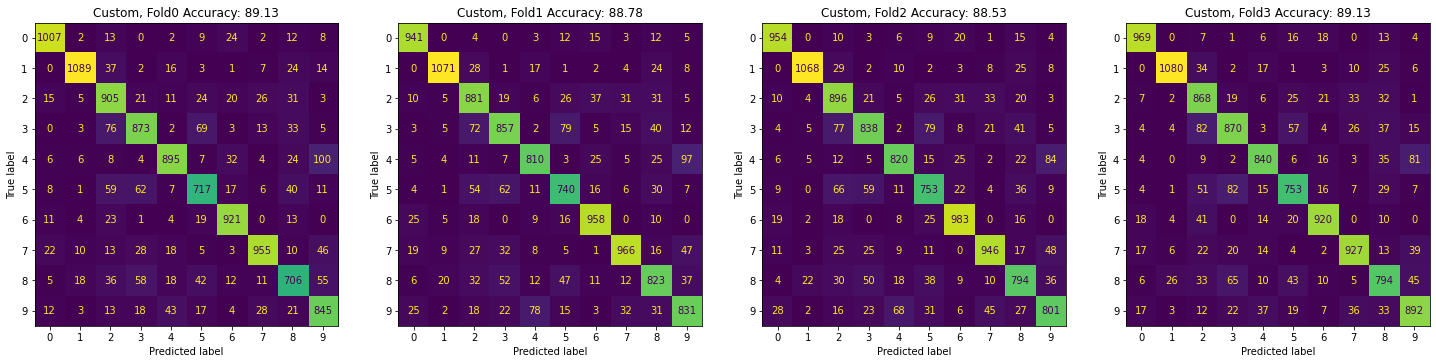

In [10]:
figure, ax = plt.subplots(nrows = 1, ncols = num_folds, figsize = (25,10))
min_accuracy = 100
bayes_report = {}


for i in range(num_folds):
    
    gnb = GaussianNB()   # in-built sklearn
    gnb.fit(X_train[i], y_train[i])
    y_pred = gnb.predict(X_test[i])
    
      
    cm = confusion_matrix(y_actual[i], y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix =cm)
    #f1_score(y_actual, y_pred, labels=np.unique(y_pred))
    
    precision = precision_score(y_actual[i], y_pred, average = 'micro',  zero_division=0)
    print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(y_actual[i], y_pred,average = 'micro', zero_division=0)
    print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(y_actual[i], y_pred, average = 'micro', zero_division=0)
    print('f1 score: {0:0.2f}'.format(f1))
    
    accuracy = accuracy_score(y_actual[i], y_pred, normalize = False)
    print('Accuracy: {0:0.2f}'.format(accuracy/100))
    if (accuracy < min_accuracy):
        min_accuracy = accuracy
        bayes_report = classification_report(y_actual[i], y_pred, output_dict = True)
        print(bayes_report)
    ax[i].set_title("Custom, Fold" + str(i) + " Accuracy: "  +str(accuracy/100))
    disp.plot(ax = ax[i],colorbar = False)

<b>Running the in-built Support Vector Machine classifier on the cross-validation data</b>

Precision score: 0.90
Recall score: 0.90
f1 score: 0.90
Accuracy: 94.48
Precision score: 0.90
Recall score: 0.90
f1 score: 0.90
Accuracy: 94.13
Precision score: 0.90
Recall score: 0.90
f1 score: 0.90
Accuracy: 94.38
Precision score: 0.90
Recall score: 0.90
f1 score: 0.90
Accuracy: 94.87


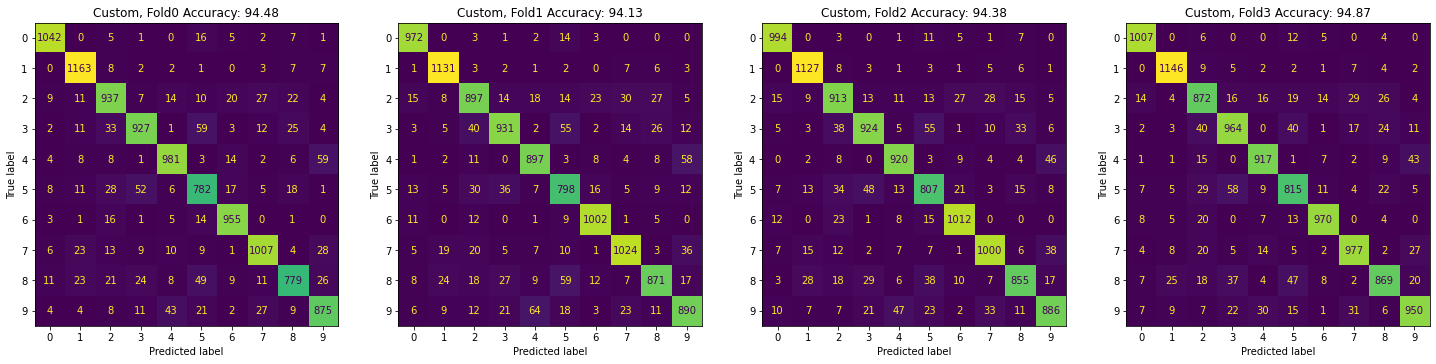

In [11]:

figure, ax = plt.subplots(nrows = 1, ncols = num_folds, figsize = (25,10))
min_accuracy = 100
SVM_report = {}


for i in range(num_folds):
    
  
   SVM = SVC(kernel='linear', random_state = 234)
   SVM.fit(X_train[i],y_train[i])
   y_pred = SVM.predict(X_test[i])
   
        
   cm = confusion_matrix(y_actual[i], y_pred)
   disp = ConfusionMatrixDisplay(confusion_matrix =cm)
    #f1_score(y_actual, y_pred, labels=np.unique(y_pred))
    
   precision = precision_score(y_actual[i], y_pred, average = 'micro',  zero_division=0)
   print('Precision score: {0:0.2f}'.format(precision))

   recall = recall_score(y_actual[i], y_pred,average = 'micro', zero_division=0)
   print('Recall score: {0:0.2f}'.format(recall))

   f1 = f1_score(y_actual[i], y_pred, average = 'micro', zero_division=0)
   print('f1 score: {0:0.2f}'.format(f1))
    
   accuracy = accuracy_score(y_actual[i], y_pred, normalize = False)
   print('Accuracy: {0:0.2f}'.format(accuracy/100))
   
   if (accuracy < min_accuracy):
       min_accuracy = accuracy
       SVM_report = classification_report(y_actual[i], y_pred, output_dict = True)
       print(SVM_report)
   ax[i].set_title("Custom, Fold" + str(i) + " Accuracy: "  +str(accuracy/100))
   disp.plot(ax = ax[i],colorbar = False)
    
    

### <b>1D. Analysis of the Results:<br>
(1) I tried the Gaussian Bayes classification with covariance. It showed very poor performance and hence I looked up the formula for the Naive Gaussian Bayes and used the instead and it gave me around 89%. Then I ran the sklearn inbuilt Gaussian Bayes function and it provided the same accuracy.<br>
(2) I also tried the Probabilistic Neural Network (PNN) but didn't get success as the predict function was taking too long, wasn't coming out of that loop. Hence, gave up after some research.<br>
(3) I then tried Support Vector Machine (SVC) inbuilt classifier with kernel as 'rbf'. This gave me accuracy more than 100%. Not sure if the data is overfitted. I have to understand the reason for this. At present I am not clear about the reason.I then changed the kernel to 'linear' and it gave a decent accuracy of 94% which is considered to be very good.<br>
(4) All the above classifiers are taking few seconds(O(6 to 12sec)  to run.<br>
(5) The number of folds and features in K-fold were adjusted to tune the model for a better accuracy. In Gaussian Bayes algorithm, when I had selected no_of_folds as '5' , the accuracy was in 70's, also if the features were around '25', the accuracy was in 65%. When I reduced the folds to '4' and features to '30', I got the accuracy of 89% which is quite decent.<br> 
(6) It is observed that digit '1' has highest classification accuracy and digit '5'has the lowest classification accuracy.<br>
(7) It is also observed that digit '5' and digit '3' are very easily misclassified for each other and so is digit '6' and digit '9'<br>

## <u><font color = 'Blue'> Deep Learning  </u></font> 


<b>Here, we use a built-in CNN to process the original MNIST numerical data set. The goal is
as follows:<br>
A. Use a built-in CNN to accept the training MNIST data <br>
B. Use the training MNIST data set as inputs to the trained CNN, use the first 30,000 observations.<br>
C. Use the last 12,000 observations of the MNIST data set as inputs to the trained CNN for testing.<br>
D. Analyze the performance results from the output of the CNN for both the training and testing
data sets<br>

<b> Data Preparation</b><br>
The following techniques are used :<br>
    i.  Data loading - data is loaded from the csv file into the pandas dataframe and the label column is dropped.<br>
    ii. Normalization - Gray scale normalization is performed.<br>
    iii.Reshape - Data is reshaped into height and width of 28 pixels and 1 canal.<br>
    iv. Label Encoding - Labels are encoded to one hot vector. for eg. 2 --> [0010000000]<br>
    v.  Split data into train and test datasets - The data is split into train and validation data sets for modeling.<br>
    

The CNN code using Keras and TensorFlow is given as below. Please refer to the complete code in CNNDL.py

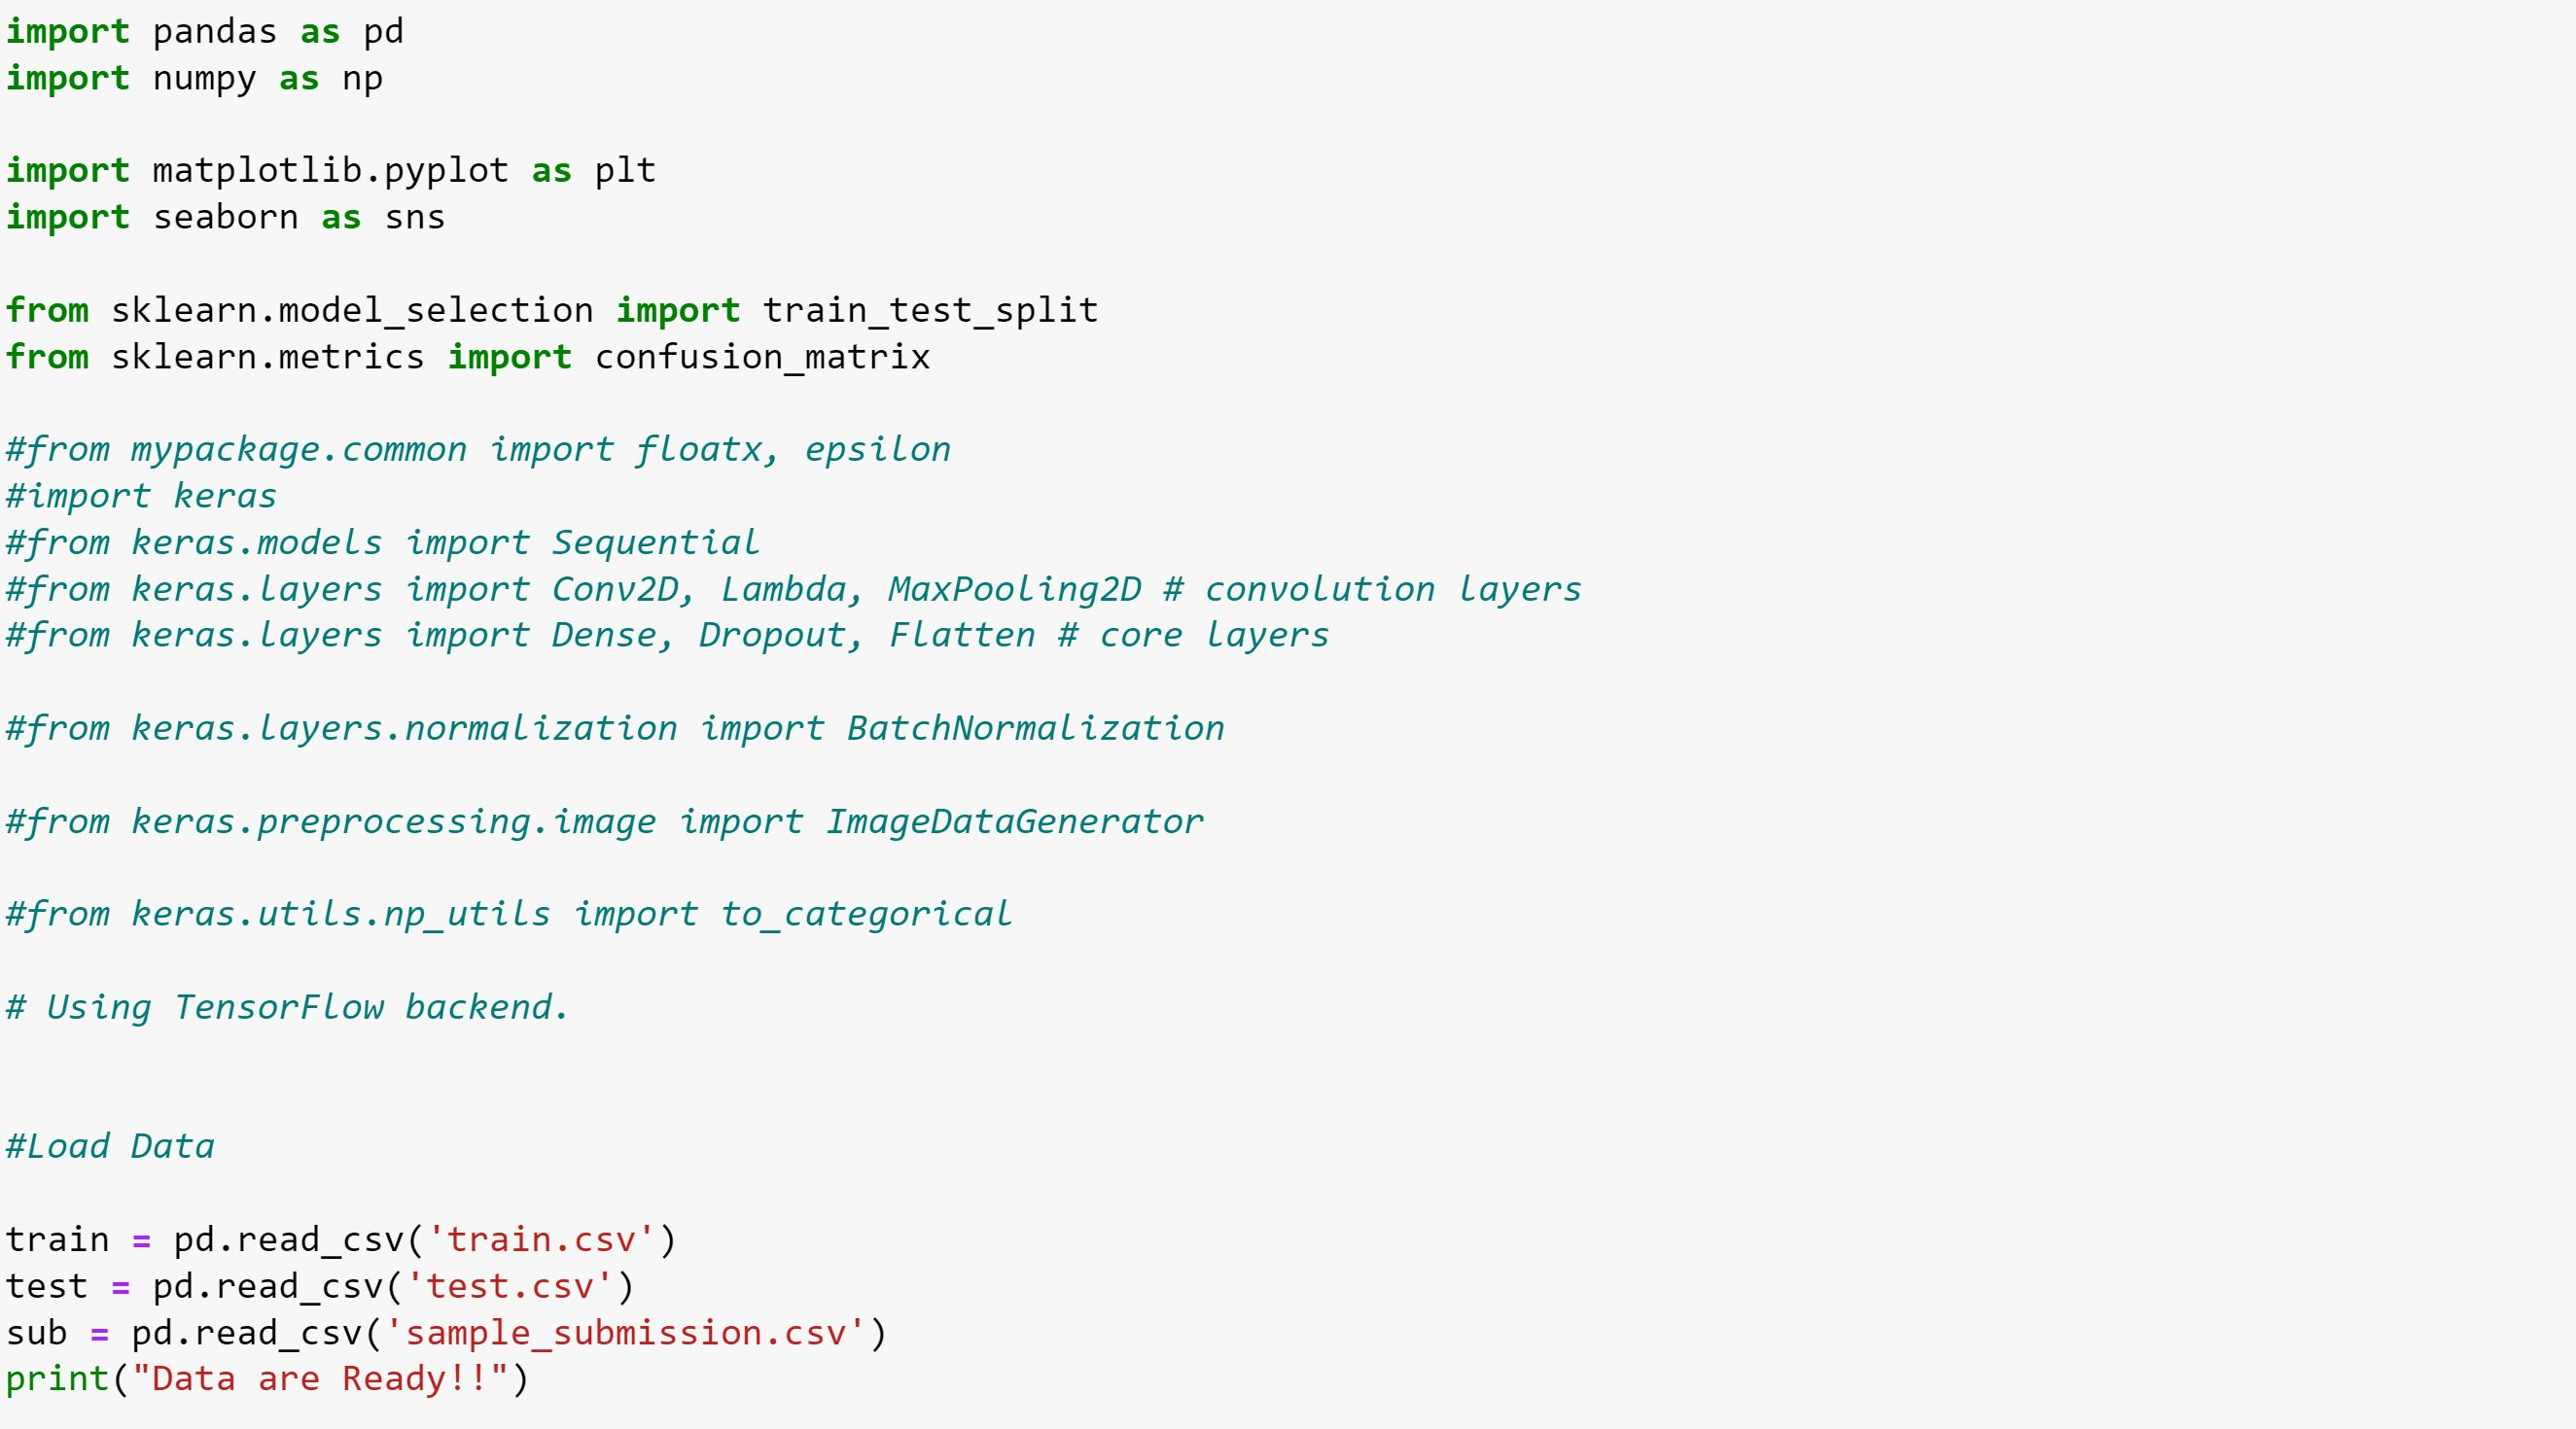

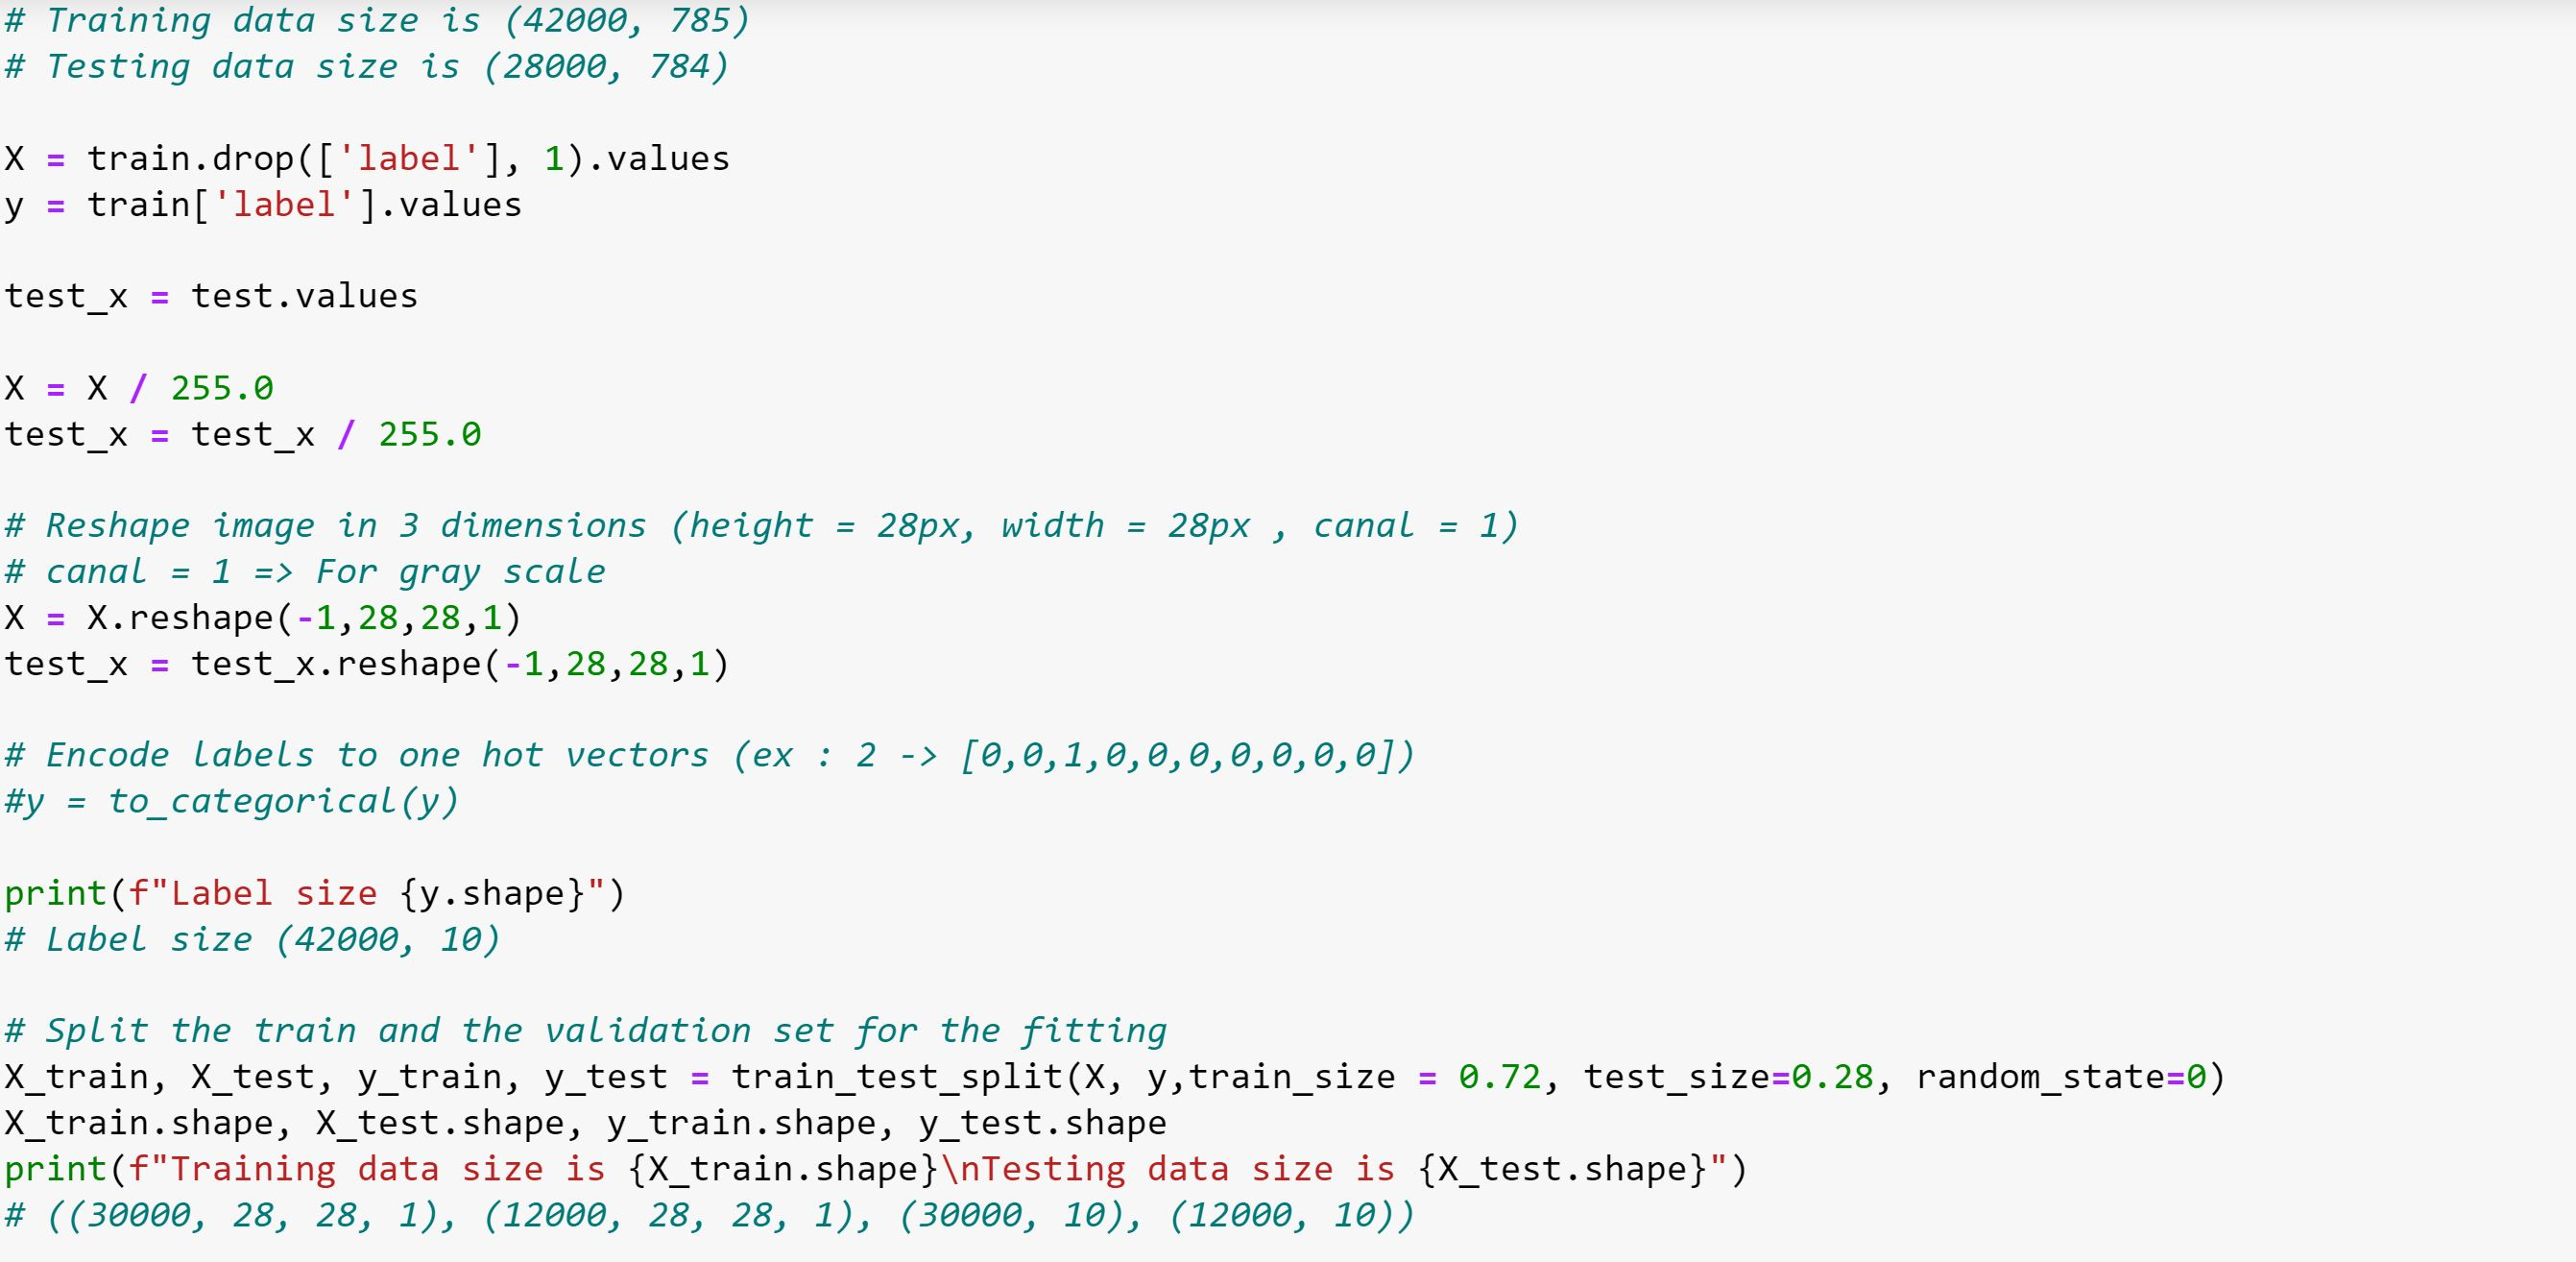

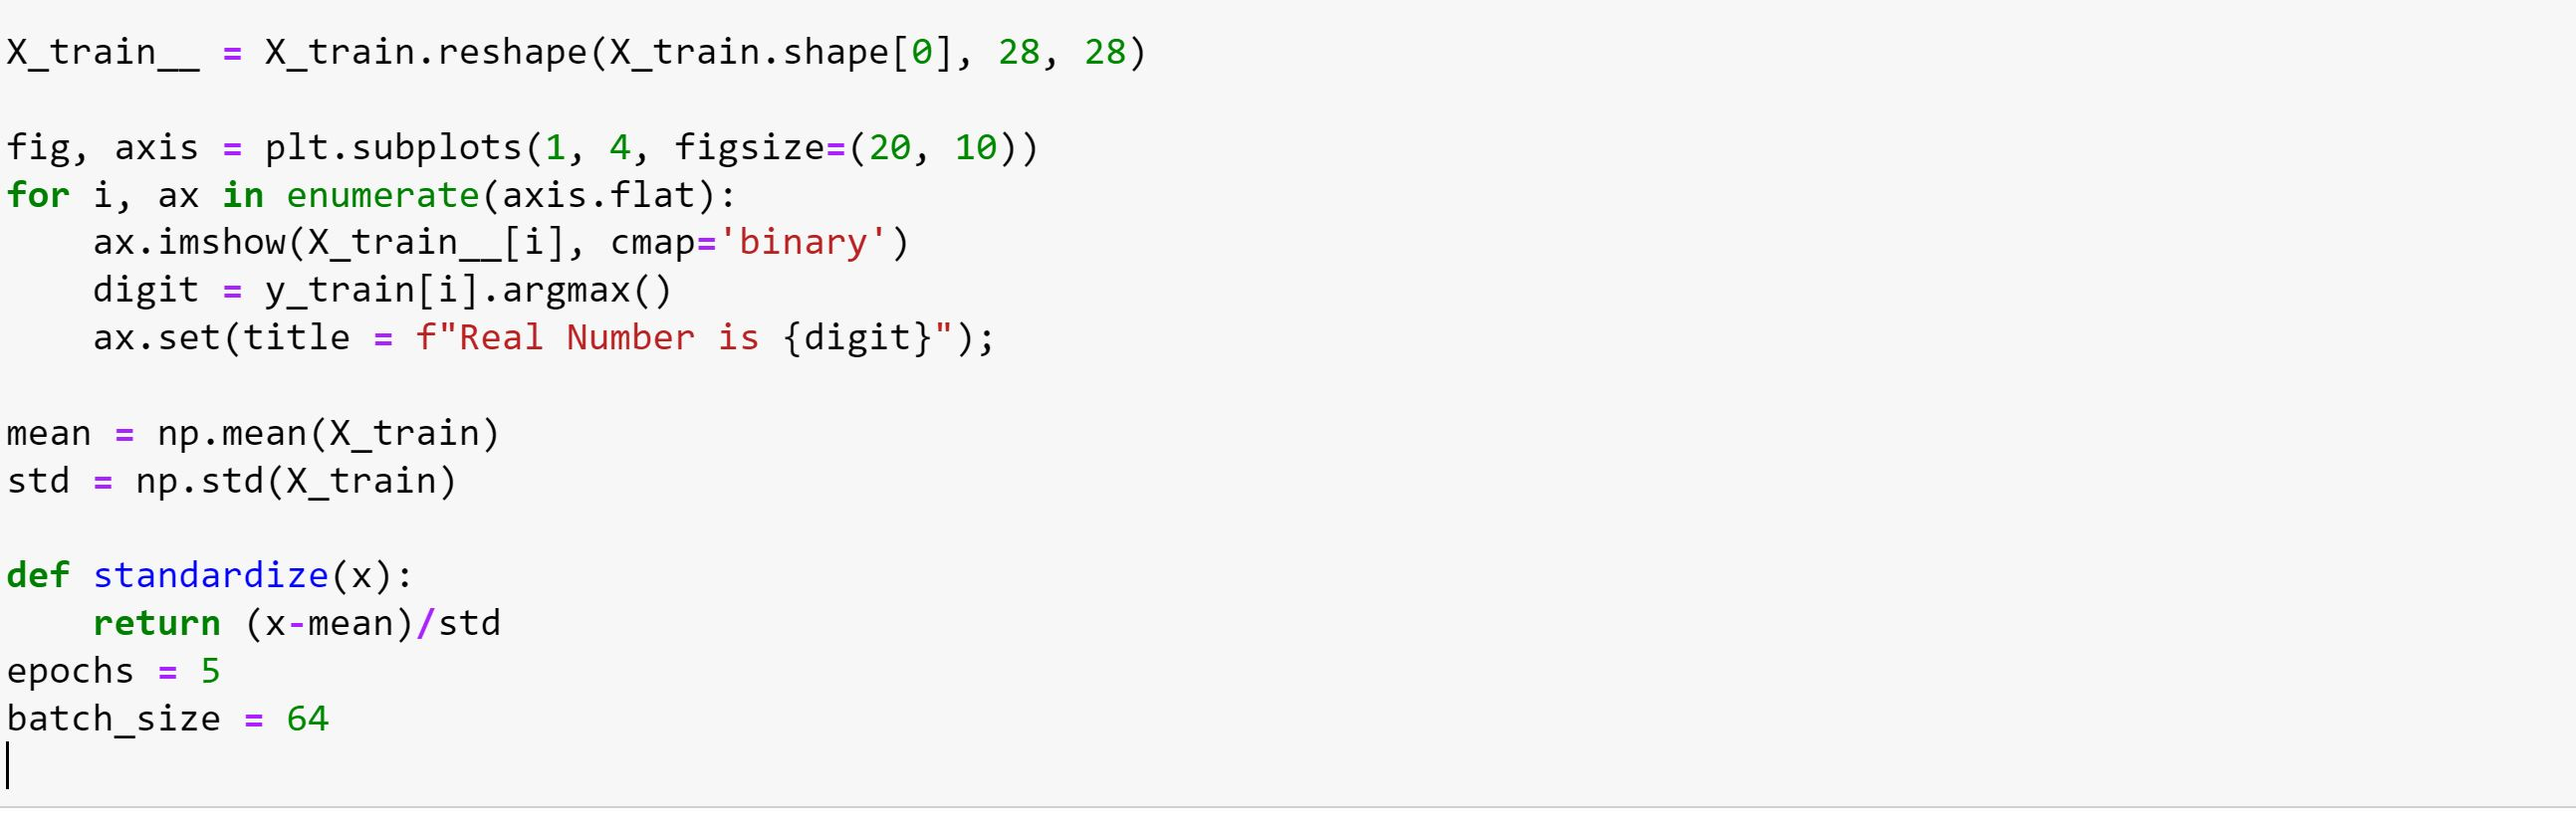

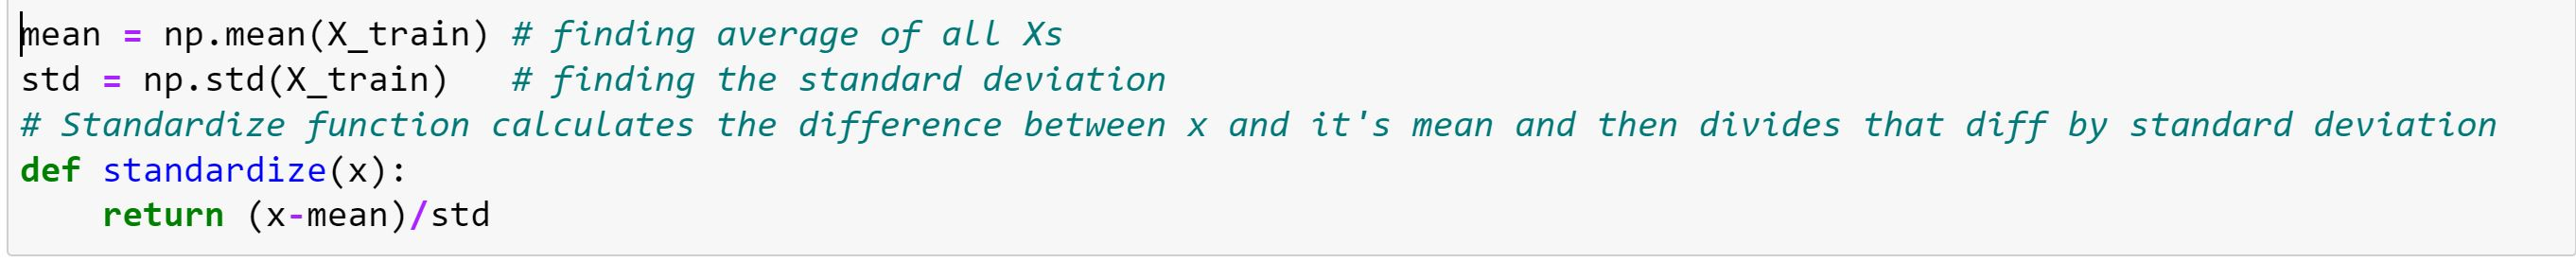

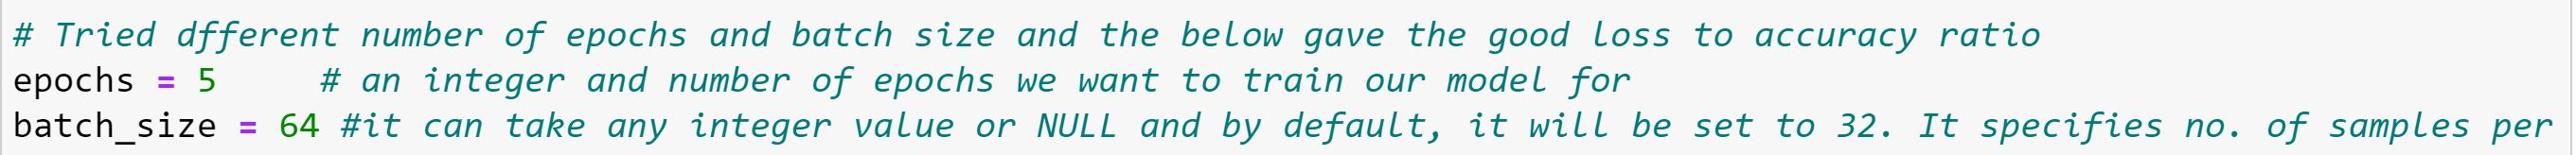

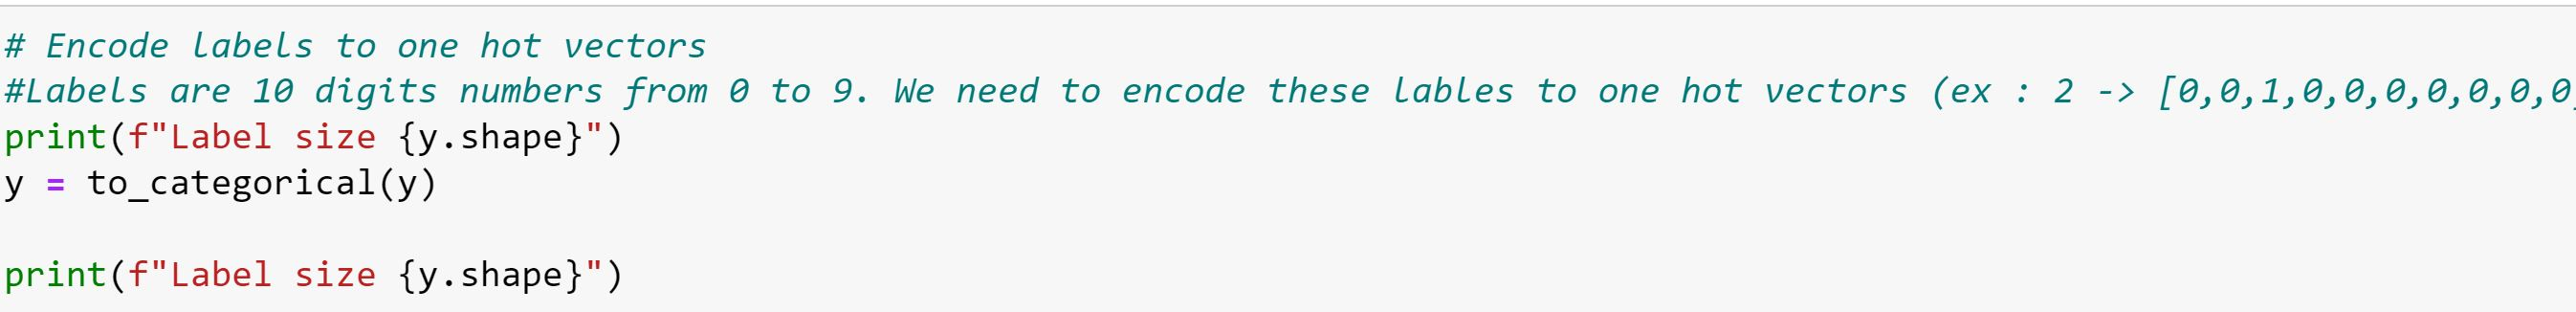

### <u><b>CNN</b></u><br>

2.2 Define the Model<br>

Here, the author has used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.<br>
<br>
The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. the author chose to set 32 filters for the two firsts conv2D layers and 64 filters for the two second layers and 128 filters for two third layers and 256 for the last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.<br>

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).<br>

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.<br>

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.
'relu' (Rectified Linear Unit) is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.As for the ReLU activation function, the gradient is 0 for all the values of inputs that are less than zero, which would deactivate the neurons in that region.<br>

The Flatten layer is used to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.<br>

In the end, the author has used the features in two fully-connected (Dense) layers which is just artificial neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

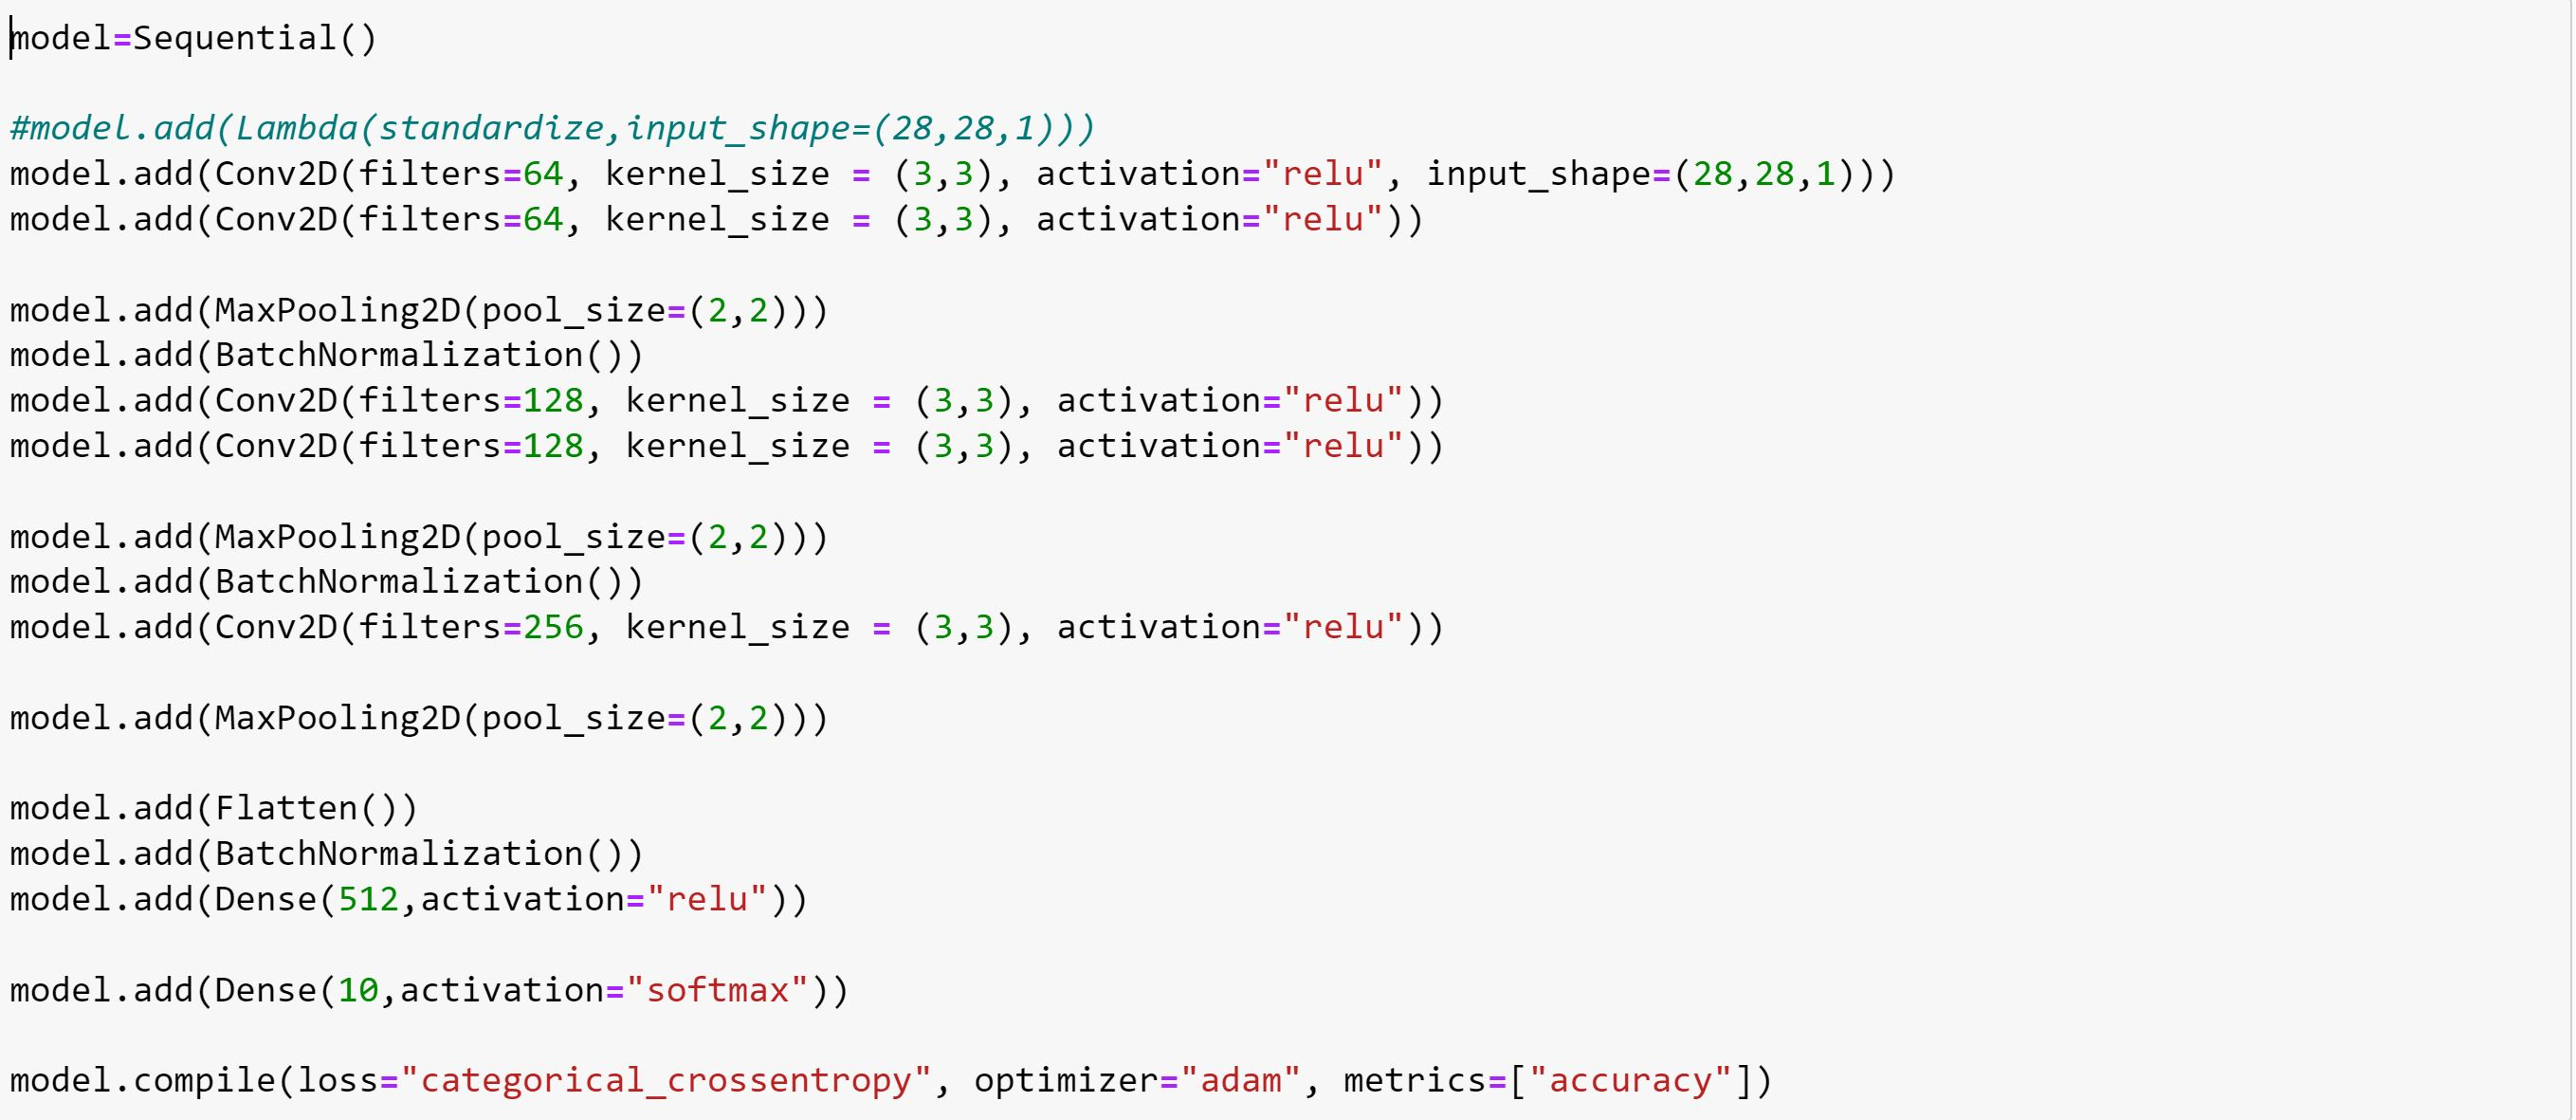

<b>3.2 Data augmentation</b><br>

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make the existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.<br>
<br>
For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...<br>

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.<br>

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.<br>

The improvement is important :<br>

Without data augmentation the model is giving an accuracy of 98.114% With data augmentation the model is giving 99.67% of accuracy<br>

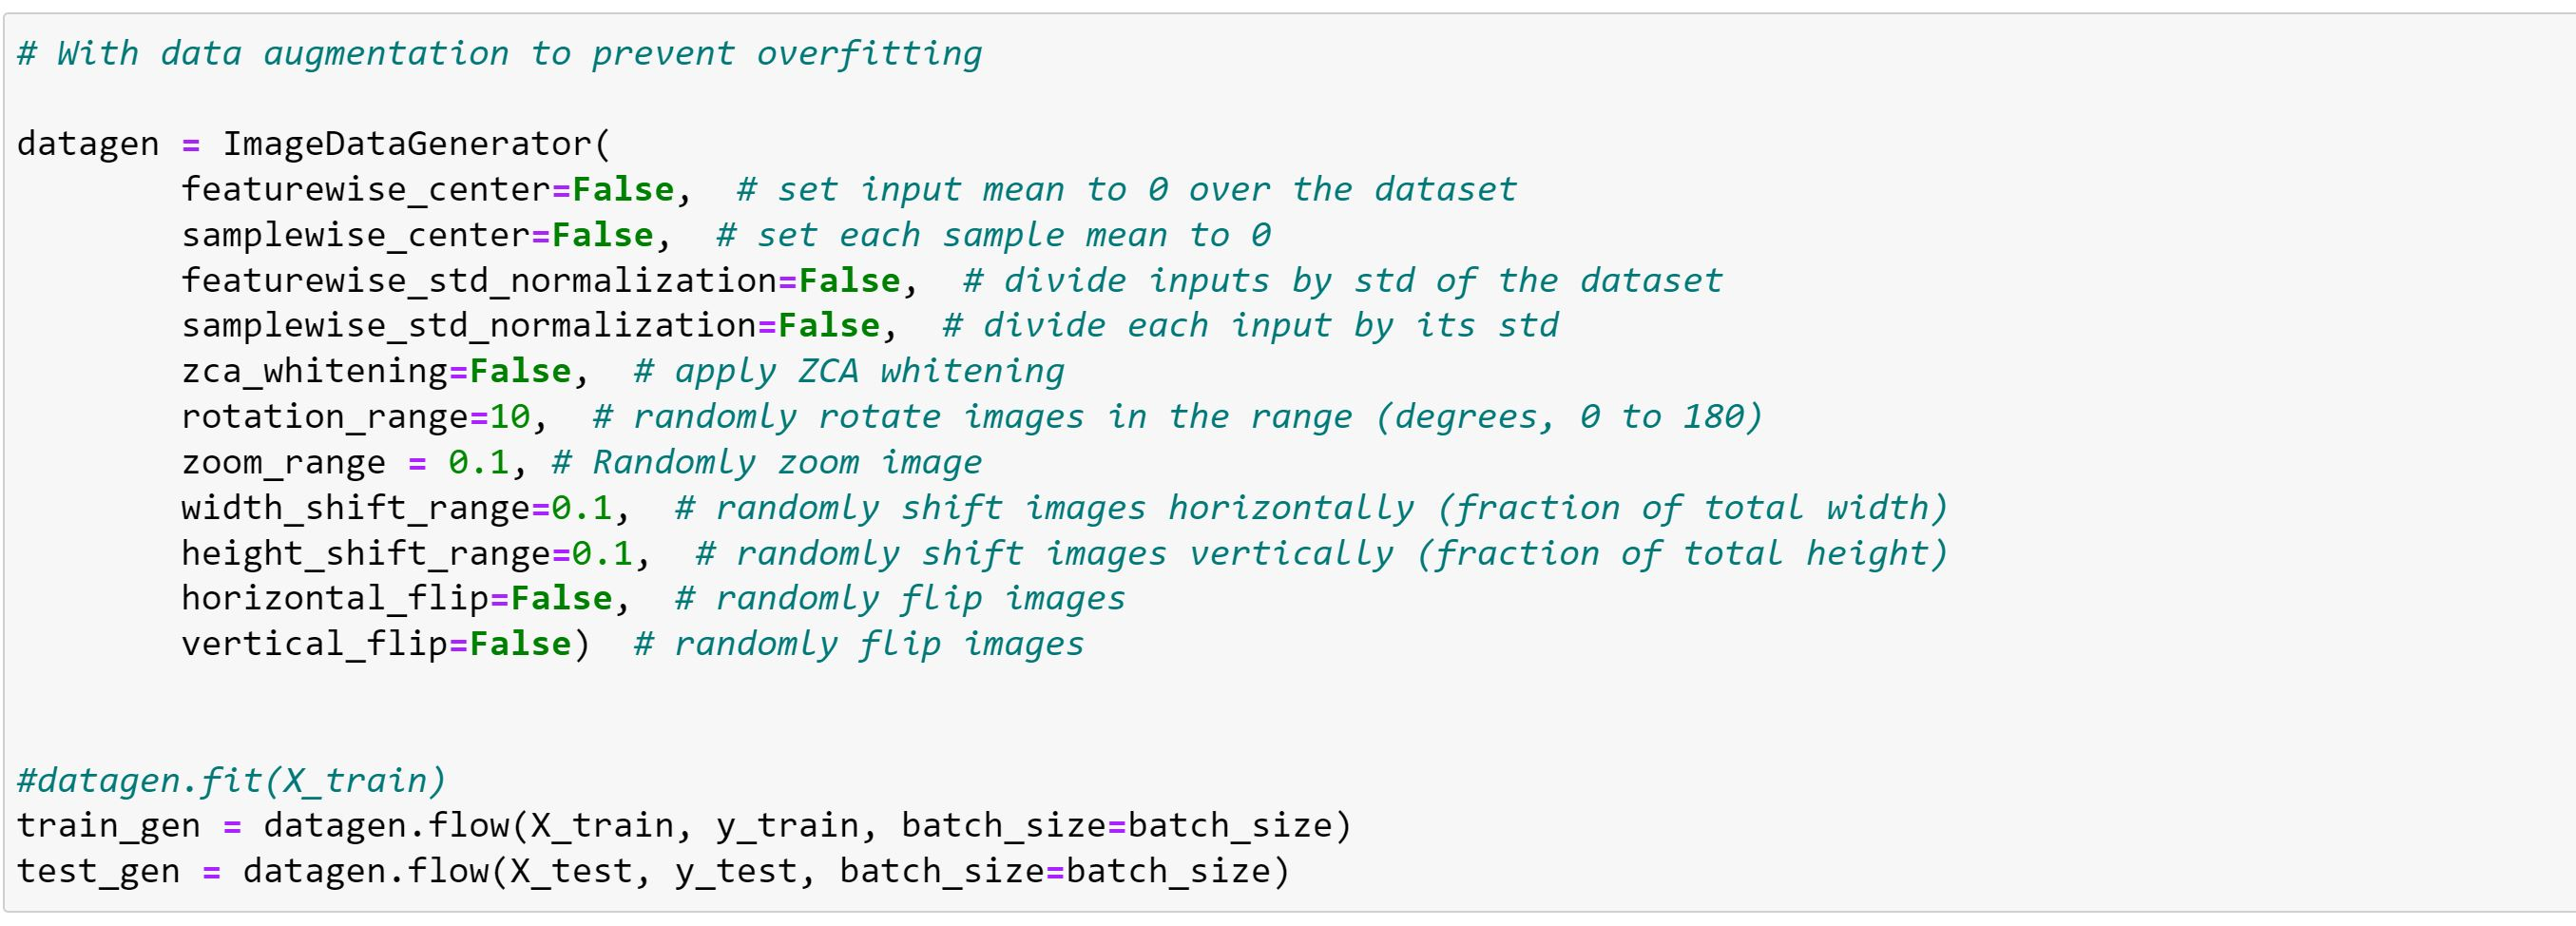

For the data augmentation, the author has chosen below data augmentation techniques:<br>
<br>
Randomly rotate some training images by 10 degrees Randomly Zoom by 10% some training images Randomly shift images horizontally by 10% of the width Randomly shift images vertically by 10% of the height The author has not applied a vertical_flip or horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.<br>
<br>
Once our model is ready, we fit the training dataset .<br>

<b>2.3 Model training</b><br>

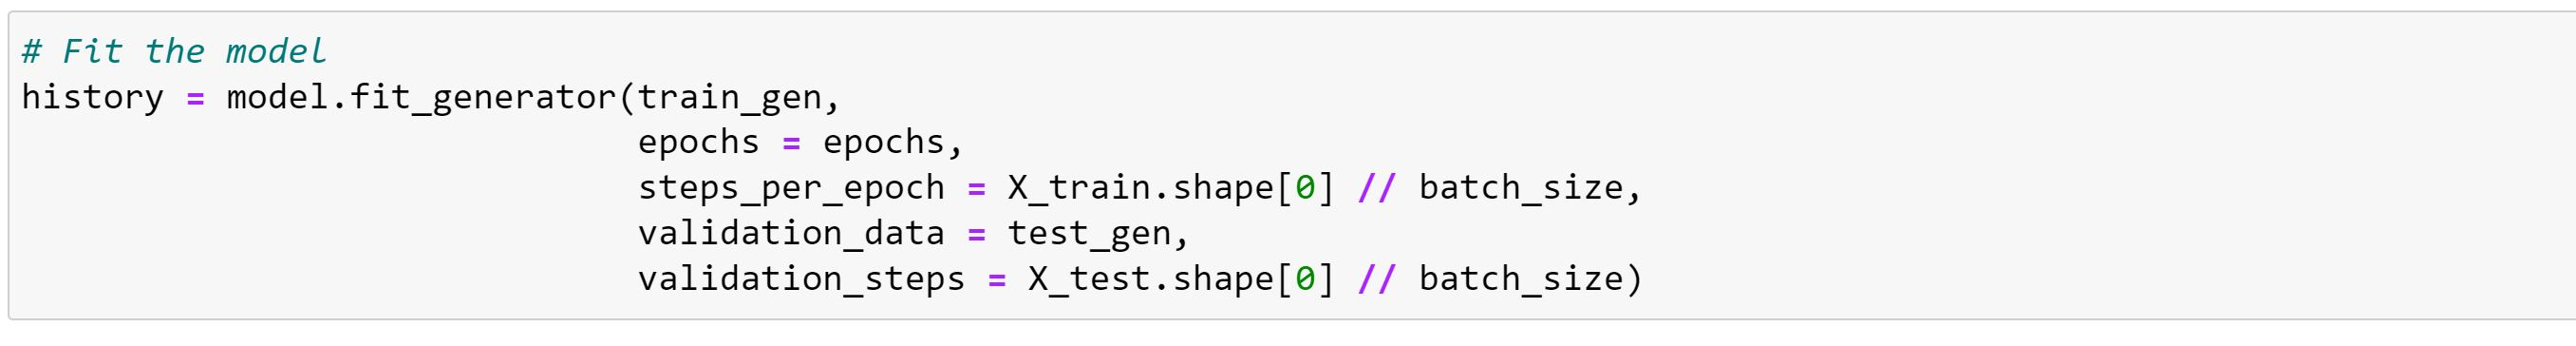

<b>2.4 Evaluate the model</b><br>

2.4.1 Training and validation curves

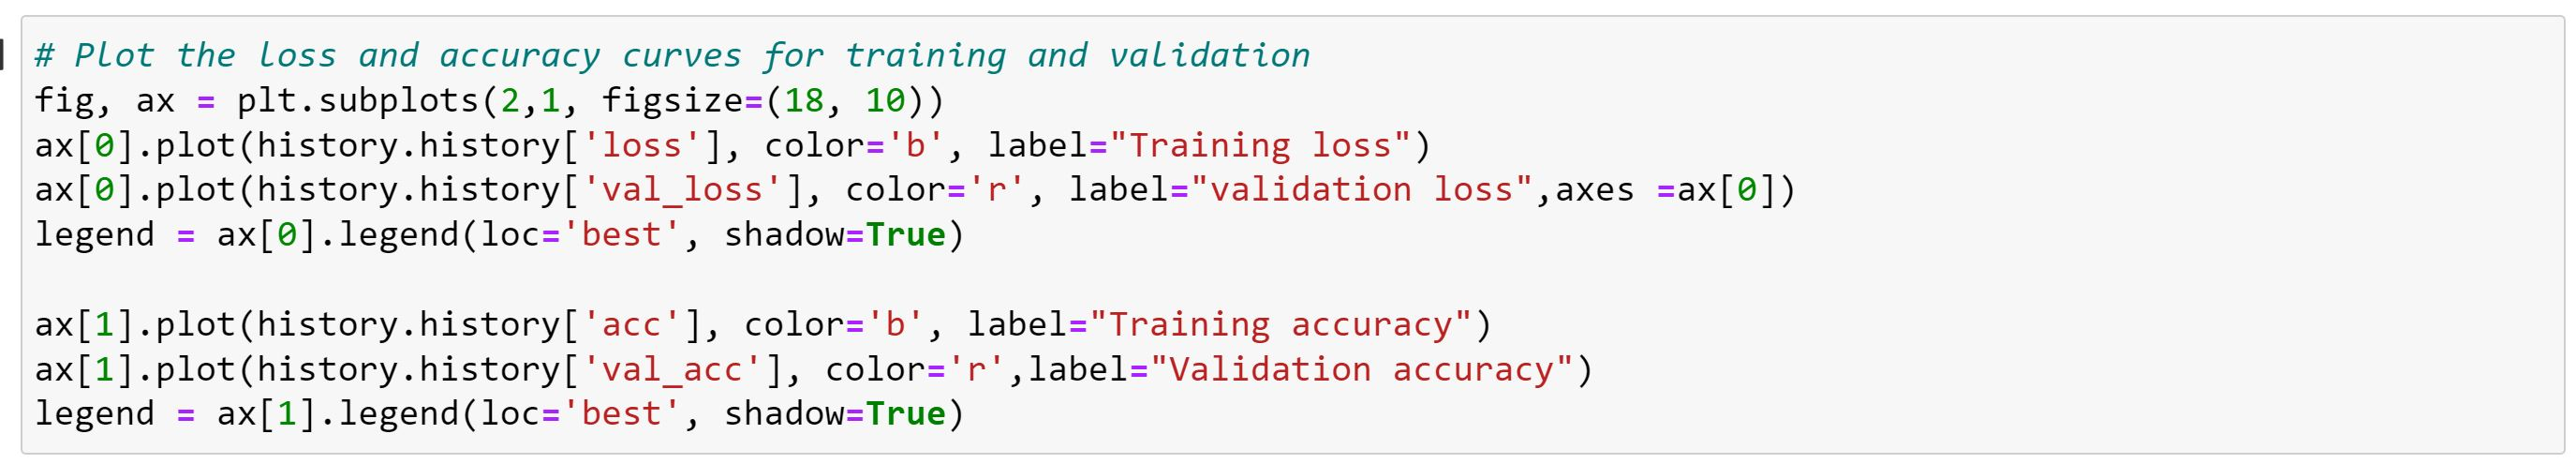

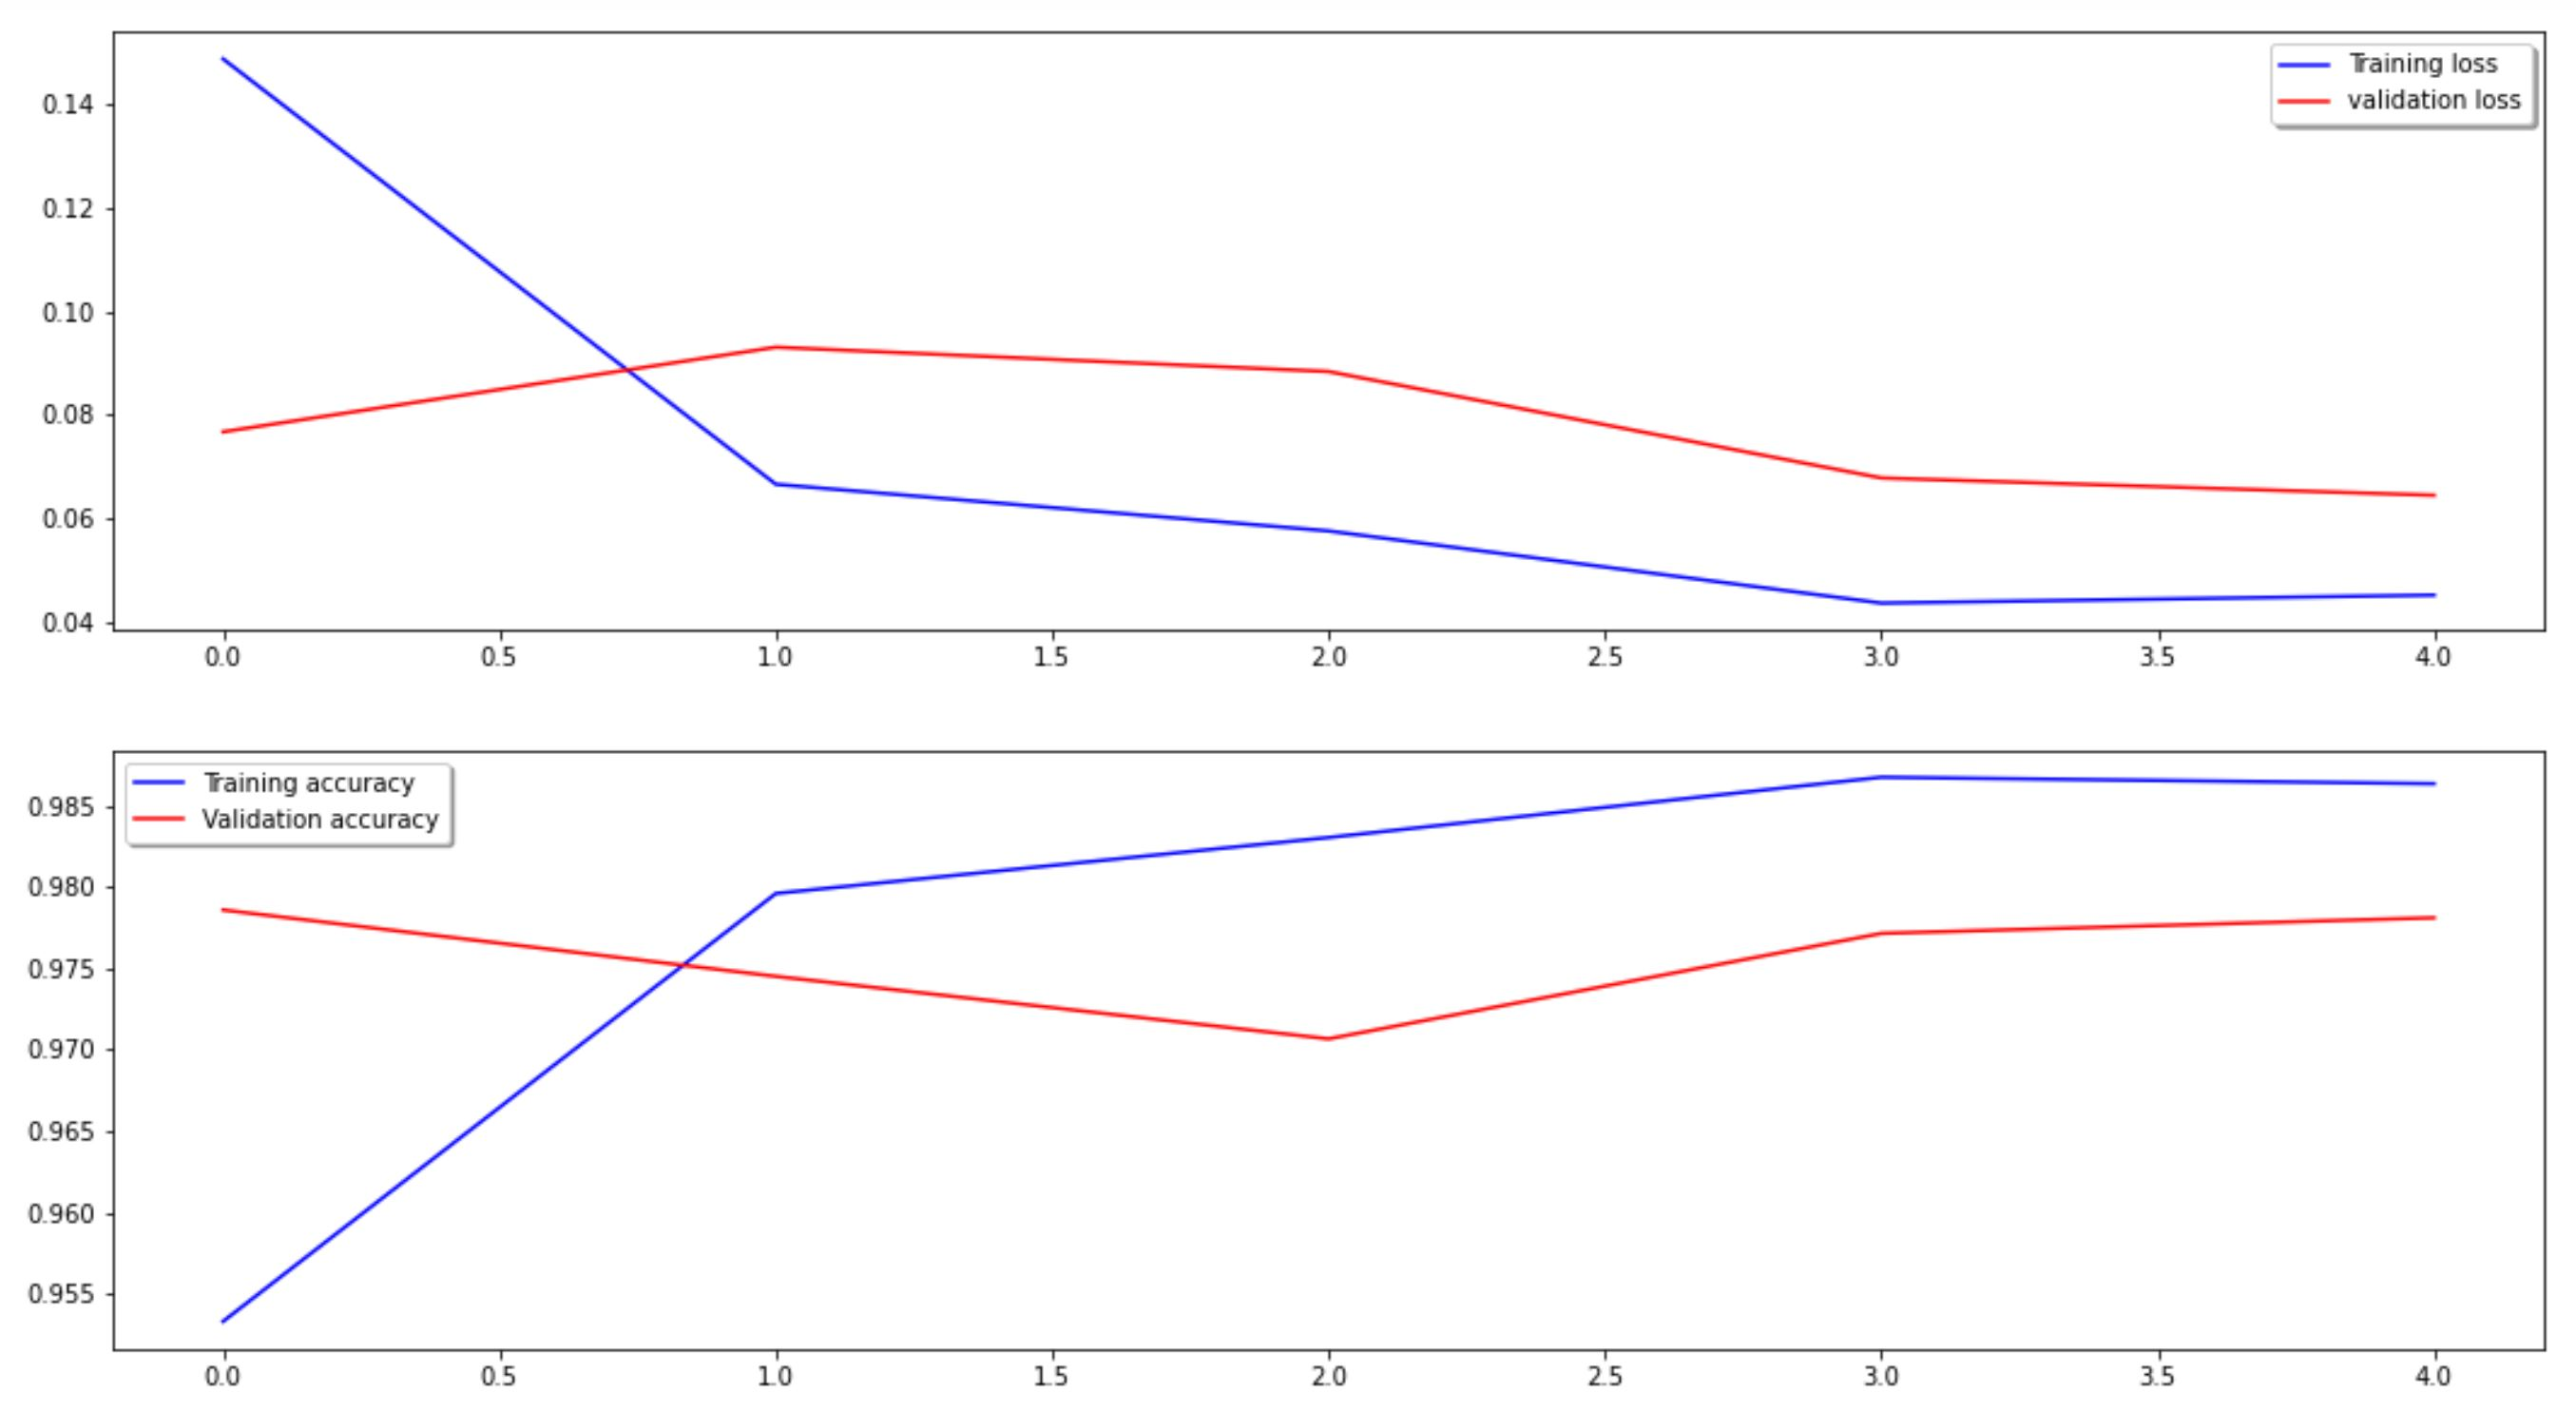

<b>2.5 Analysis</b><br>

From the above graph we see that the training loss is very low i.e. 0.05% and the validation loss is a little higher somewhere between 0.08 to 0.10.

From the above graph, it's seen that the training accuracy is quite high , as high as 98.5% but the validation accuracy is little lower like 97.5% and the lowest is 97%. Overall CNN provides high accuracy <br>



### References


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
https://dafriedman97.github.io/mlbook/content/c3/s1/fisher_discriminant.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html<br>
https://www.researchgate.net/figure/PNN-algorithm-flowchart_fig2_312519997<br>
https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-4-alpha-beta-pruning/<br>
https://www.kaggle.com/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1<br>